## Pfam's Protein Sequence Classification

<div style="text-align: justify">Proteins are large, complex biomolecules that play many critical roles in biological bodies. Proteins are made up of one or more long chains of amino acid sequences. There are 20 different kinds of amino acids, and the structure and function of each protein are determined by the kinds of amino acids used to make its different sequences and how they are arranged. Understanding this relationship between the protein function and the amino acid sequence is a long-standing problem in molecular biology and what we set to invastigate here is possiblity of using Deep learning for such a problem using the Pfam Database.</div>

In [ ]:

import os
import pandas as pd

data_path = './random_split' #Make sure to modify to your location
print('Available data', os.listdir(data_path))

def read_data(partition):
  data = []
  for fn in os.listdir(os.path.join(data_path, partition)):
    with open(os.path.join(data_path, partition, fn)) as f:
      data.append(pd.read_csv(f, index_col=None))
  return pd.concat(data)

# reading all data_partitions and visualizing (head) of the data
df_train = read_data('train')
df_val = read_data('dev')
df_test = read_data('test')
df_train.head()

Available data ['dev', 'random_split', 'test', 'train']


,family_id,sequence_name,family_accession,aligned_sequence,sequence
0,GMC_oxred_C,A4WZS5_RHOS5/416-539,PF05199.13,PHPE.SRIRLST.RRDAHGMP.....IP.RIESRLGP............,PHPESRIRLSTRRDAHGMPIPRIESRLGPDAFARLRFMARTCRAIL...
1,DUF2887,K9QI92_9NOSO/3-203,PF11103.8,RDSIYYQIFKRFPALIFEL..VD.NRPPQAQNYRFESVEVKETAFR...,RDSIYYQIFKRFPALIFELVDNRPPQAQNYRFESVEVKETAFRIDG...
2,zf-IS66,Q92LC9_RHIME/32-75,PF13005.7,.TCCPDCGG.E..LRLVGED.AS....EILDMI.AAQMKVIEVARL...,TCCPDCGGELRLVGEDASEILDMIAAQMKVIEVARLKKSCRCCE
3,Asp_decarbox,X2GQZ4_9BACI/1-115,PF02261.16,MLRMMMNSKIHRATVTEADLNYVGSITIDEDILDAVGMLPNEKVHI...,MLRMMMNSKIHRATVTEADLNYVGSITIDEDILDAVGMLPNEKVHI...
4,Filamin,A7SQM3_NEMVE/342-439,PF00630.19,TACPKQ.CTA....RGLG.............LK.AAPVT.QPT..R...,TACPKQCTARGLGLKAAPVTQPTRFVVILNDCHGQPLGRSEGELEV...


<h3>Data structure</h3>
The Pfam database is a large collection of protein families, each represented by multiple sequence alignments and hidden Markov models (HMMs). This database contains 5 features, they are as follows:
<ul><li><em>unaligned_sequence</em>: These are the amino acid sequence for this domain. There are 20 common amino acids (frequency > 1,000,000), 4 amino acids that are quite uncommon: U, B, O, Z and an unknown labeled as X</li>
<li><em>family_accession</em>: Accession number in form PFxxxxx.y (Pfam), where xxxxx is the family accession, and y is the version number. Some values of y are greater than ten, and so 'y' has two digits.</li>
<li><em>sequence_name</em>: Sequence name, in the form "uniprot_accession_id/start_index-end_index".</li>
    <li><em>aligned_sequence</em>: Contains a single sequence from the multiple sequence alignment with the rest of the members of the family in seed, with gaps retained.</li>
    <li><em>family_id</em>: One word name for family.</li></ul>

In [3]:
# Inspecting how is it split between train, test, and dev
print('Dataset partition "%s" has %d sequences' % ('train', len(df_train)))
print('Dataset partition "%s" has %d sequences' % ('test', len(df_test)))
print('Dataset partition "%s" has %d sequences' % ('dev', len(df_val)))

Dataset partition "train" has 1086741 sequences
Dataset partition "test" has 126171 sequences
Dataset partition "dev" has 126171 sequences


So the provided sizes are as follows:
<ul>
    <li>Train is 80%</li>
    <li>Test is 10%</li>
    <li>Dev/Val is 10%</li>
</ul>

In [4]:
#Inspecting potential inputs
print(df_train.head(1)['sequence'].values[0])
print(df_train.head(1)['aligned_sequence'].values[0])

PHPESRIRLSTRRDAHGMPIPRIESRLGPDAFARLRFMARTCRAILAAAGCAAPFEEFSSADAFSSTHVFGTCRMGHDPMRNVVDGWGRSHRWPNLFVADASLFPSSGGGESPGLTIQALALRT
PHPE.SRIRLST.RRDAHGMP.....IP.RIESRLGP............DAFARLR....FMAR.TCRAILAAA.........................................................GCAAPFEEFSSADAFSST...........................HVF.GTCRM.GHDPMR......NVVD.GWGRSHRWPNLFVADASLFPSSGGGESPGLTIQALA...LRT


In [5]:
#Inspecting potential labels
import numpy as np

print('Number of unique family_accesion in Train: ', len(np.unique(df_train['family_accession'].values)))
print('Number of unique family_id in Train: ', len(np.unique(df_train['family_id'].values)))
print('Number of unique sequence_name in Train: ', len(np.unique(df_train['sequence_name'].values)))

Number of unique family_accesion in Train:  17929
Number of unique family_id in Train:  17929
Number of unique sequence_name in Train:  1086741


### Feature selection

From what we have seen so far the unaligned sequences seems to be containing less holes (missing codes) compared to the aligned sequences so that would be our input. For the output/label it seems that both the family_accession or family_id could be used. Thus we chosen the family_accession since it the most common. The sequence_names seems to be more specialized hence it will not be even considered as a label nor as an input since there could be a direct correlation between it and the label of choice (family_accession)

In [6]:
#Inspecting our labels
import matplotlib.pyplot as plt

print('Number of unique classes in Train: ', len(np.unique(df_train['family_accession'].values)))
print('Number of unique classes in Val: ', len(np.unique(df_val['family_accession'].values)))
print('Number of unique classes in Test: ', len(np.unique(df_test['family_accession'].values)))


df_train.family_accession.value_counts()

Number of unique classes in Train:  17929
Number of unique classes in Val:  13071
Number of unique classes in Test:  13071


PF13649.6     3637
PF00560.33    1927
PF13508.7     1761
PF06580.13    1537
PF02397.16    1528
              ... 
PF05865.11       1
PF12124.8        1
PF13294.6        1
PF03430.13       1
PF12383.8        1
Name: family_accession, Length: 17929, dtype: int64

In [7]:
df_val.family_accession.value_counts()

PF13649.6     454
PF00560.33    240
PF13508.7     219
PF06580.13    192
PF02397.16    190
             ... 
PF12845.7       1
PF06384.11      1
PF16623.5       1
PF01499.16      1
PF15337.6       1
Name: family_accession, Length: 13071, dtype: int64

In [8]:
df_test.family_accession.value_counts()

PF13649.6     454
PF00560.33    240
PF13508.7     219
PF06580.13    192
PF02397.16    190
             ... 
PF09462.10      1
PF18646.1       1
PF02995.17      1
PF02896.18      1
PF07400.11      1
Name: family_accession, Length: 13071, dtype: int64

### Problem
The number of unique classes in each partition is not similar. Not only that but some of the classes are not that common (an appearance per partition).


#### Solution
We will consider only the 100 most common family accession this insures that we have the same family accessions in all partitions as well as reduce the amount of data to accommodate for kaggle computational limitations.

<Axes: >

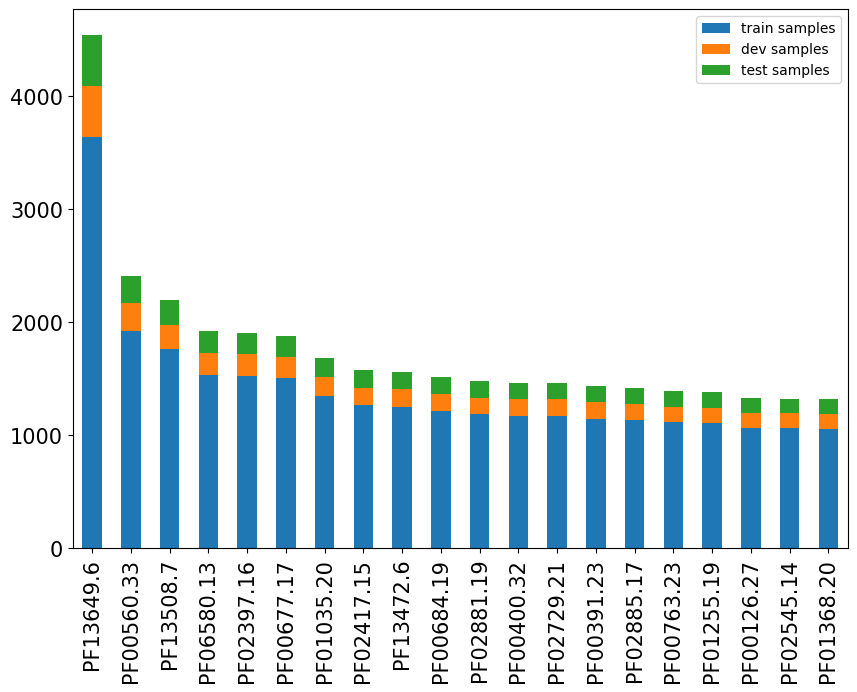

In [9]:
#selecting 100 most common labels
commonLables = df_train.family_accession.value_counts()[:100]

mask = df_train.family_accession.isin(commonLables.index.values)
train_sm = df_train.loc[mask,:]

mask = df_val.family_accession.isin(commonLables.index.values)
val_sm = df_val.loc[mask,:]

mask = df_test.family_accession.isin(commonLables.index.values)
test_sm = df_test.loc[mask,:]

#inspecting the labels distribution
valCounts = pd.concat([pd.DataFrame(df_train.family_accession.value_counts()[:20]), 
           pd.DataFrame(df_val.family_accession.value_counts()[:20]), 
           pd.DataFrame(df_test.family_accession.value_counts()[:20])], 
          axis=1)
valCounts.columns = ['train samples', 'dev samples', 'test samples']
valCounts.plot.bar(figsize = (10,7), fontsize = 15, stacked=True)

In [10]:
#Creating a unique int for each label
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

y_train_le = le.fit_transform(train_sm['family_accession'])
y_val_le = le.transform(val_sm['family_accession'])
y_test_le = le.transform(test_sm['family_accession'])

C:\Users\LEGION\AppData\Local\Temp\ipykernel_1736\249528806.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['seq_char_count'].values)
C:\Users\LEGION\AppData\Local\Temp\ipykernel_1736\249528806.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['seq_char_count'].values)
C:\Users\LEGIO

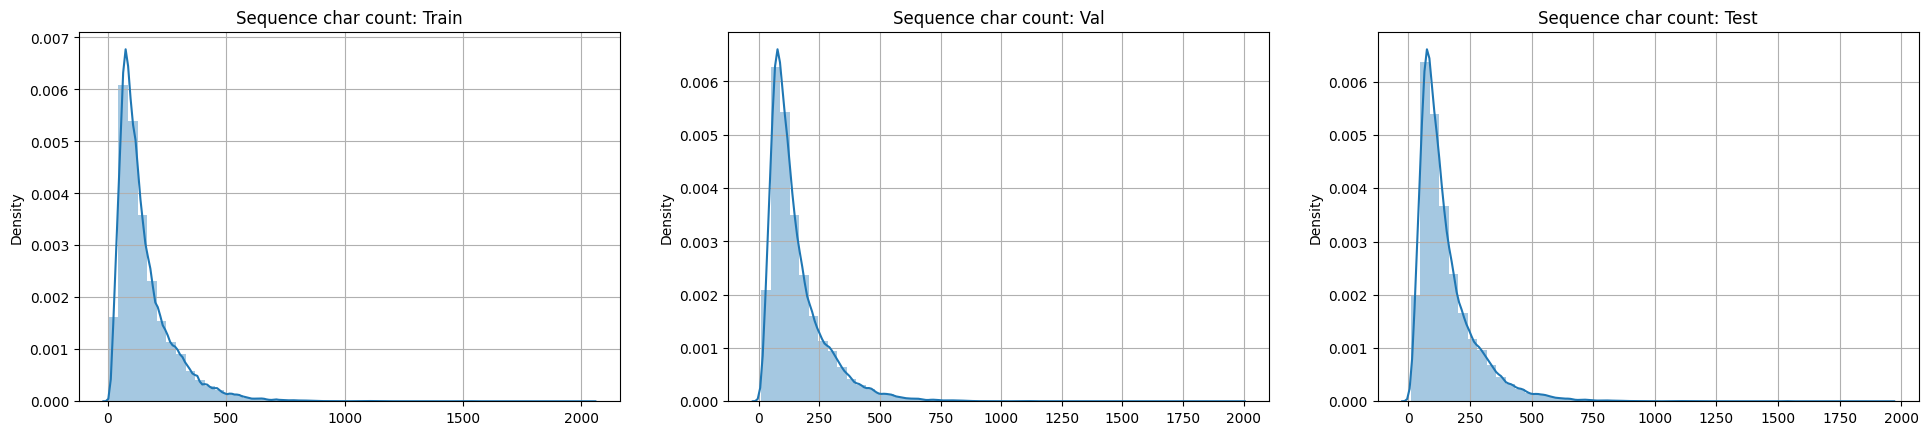

In [11]:
#Inspecting our sequences
import seaborn as sns

df_train['seq_char_count']= df_train['sequence'].apply(lambda x: len(x))
df_val['seq_char_count']= df_val['sequence'].apply(lambda x: len(x))
df_test['seq_char_count']= df_test['sequence'].apply(lambda x: len(x))

def plot_seq_count(df, data_name):
  sns.distplot(df['seq_char_count'].values)
  plt.title(f'Sequence char count: {data_name}')
  plt.grid(True)

plt.subplot(1, 3, 1)
plot_seq_count(df_train, 'Train')

plt.subplot(1, 3, 2)
plot_seq_count(df_val, 'Val')

plt.subplot(1, 3, 3)
plot_seq_count(df_test, 'Test')

plt.subplots_adjust(right=3.0)
plt.show()

Codes: Train
Total unique codes: 25
Codes: Val
Total unique codes: 22
Codes: Test
Total unique codes: 24


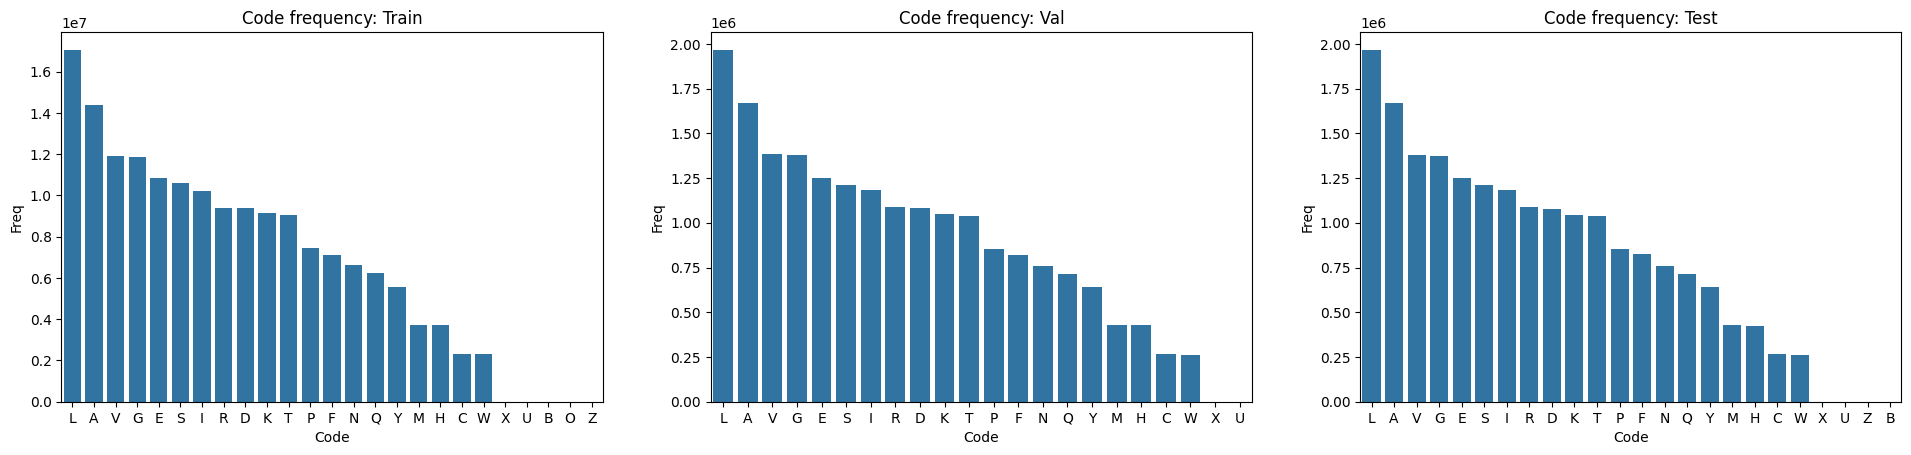

In [12]:
#Inspecting the amino acid codes
from collections import Counter

def get_code_freq(df, data_name):
  
  df = df.apply(lambda x: " ".join(x))
  
  codes = []
  for i in df: # concatination of all codes
    codes.extend(i)

  codes_dict= Counter(codes)
  codes_dict.pop(' ') # removing white space
  
  print(f'Codes: {data_name}')
  print(f'Total unique codes: {len(codes_dict.keys())}')

  df = pd.DataFrame({'Code': list(codes_dict.keys()), 'Freq': list(codes_dict.values())})
  return df.sort_values('Freq', ascending=False).reset_index()[['Code', 'Freq']]
  
# train code sequence
train_code_freq = get_code_freq(df_train['sequence'], 'Train')

# val code sequence
val_code_freq = get_code_freq(df_val['sequence'], 'Val')

# test code sequence
test_code_freq = get_code_freq(df_test['sequence'], 'Test')

def plot_code_freq(df, data_name):
  
  plt.title(f'Code frequency: {data_name}')
  sns.barplot(x='Code', y='Freq', data=df)

plt.subplot(1, 3, 1)
plot_code_freq(train_code_freq, 'Train')

plt.subplot(1, 3, 2)
plot_code_freq(val_code_freq, 'Val')

plt.subplot(1, 3, 3)
plot_code_freq(test_code_freq, 'Test')

plt.subplots_adjust(right=3.0)
plt.show()

### Problem
The length of the unaligned sequences is not similar. Not only that but some of the amino acids (the uncommon ones and the unknown) are not that frequent.


#### Solution
We will start first by remove the amino acids that are not as frequent, This will be carried out during encoding by not assigning an values to aformentioned amino acids. After that in since most of unligned sequences have a length between 50-250 we will set them all to a 100 by trancuting the long ones and padding those that fall short.

In [13]:
#creating encoding dict for the common amino acids
codes = ['A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L',
         'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V', 'W', 'Y']

def create_dict(codes):
  char_dict = {}
  for index, val in enumerate(codes):
    char_dict[val] = index+1

  return char_dict

char_dict = create_dict(codes)

#encoding the sequences using only the common amino acids dict
def integer_encoding(data):
  """
  - Encodes code sequence to integer values.
  - 20 common amino acids are taken into consideration
    and rest 4 are categorized as 0.
  """
  
  encode_list = []
  for row in data['sequence'].values:
    row_encode = []
    for code in row:
      row_encode.append(char_dict.get(code, 0))
    encode_list.append(np.array(row_encode))
  
  return encode_list
  
train_encode = integer_encoding(train_sm) 
val_encode = integer_encoding(val_sm) 
test_encode = integer_encoding(test_sm)

In [14]:
#limiting sequence lengths to a 100
from tensorflow.keras.preprocessing.sequence import pad_sequences

max_length = 100
train_pad = pad_sequences(train_encode, maxlen=max_length, padding='post', truncating='post')
val_pad = pad_sequences(val_encode, maxlen=max_length, padding='post', truncating='post')
test_pad = pad_sequences(test_encode, maxlen=max_length, padding='post', truncating='post')

print(train_pad.shape, val_pad.shape, test_pad.shape)

(92983, 100) (11565, 100) (11565, 100)


In [15]:
# One hot encoding the sequences
from tensorflow.keras.utils import to_categorical

train_ohe = to_categorical(train_pad)
val_ohe = to_categorical(val_pad)
test_ohe = to_categorical(test_pad)

print(train_ohe.shape, val_ohe.shape, test_ohe.shape) 

(92983, 100, 21) (11565, 100, 21) (11565, 100, 21)


In [16]:
# Doing the same for the labels
y_train = to_categorical(y_train_le)
y_val = to_categorical(y_val_le)
y_test = to_categorical(y_test_le)

y_train.shape, y_val.shape, y_test.shape

((92983, 100), (11565, 100), (11565, 100))

## Model
From what we have seen so far this problem is similar to that of any NLP problem so we implying a model that we've used in [1]

[1] Y. I. Cherifi and A. Dahimene, “Improved Voice-Based Biometrics using MultiChannel Transfer Learning,” IADIS Int. J. Comput. Sci. Syst., vol. 15, no. 1, pp. 99–113,2020.

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.regularizers import l2
from tensorflow.keras.constraints import max_norm
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Input, Dense, Dropout, Flatten, Activation
from tensorflow.keras.layers import Conv1D, Add, MaxPooling1D, BatchNormalization
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, GlobalMaxPooling1D

x_input = Input(shape=(100,))

 
emb = Embedding(21, 100, input_length=max_length)(x_input)
# 2 bidirectional LSTMs
bi_rnn1 = Bidirectional(LSTM(100, return_sequences=True, kernel_regularizer=l2(1e-4), recurrent_regularizer=l2(1e-4), bias_regularizer=l2(1e-4), activity_regularizer=l2(1e-4)))(emb) #dropout=0.2,
bi_rnn2 = Bidirectional(LSTM(100))(bi_rnn1) #dropout=0.2, return_sequences=False,
x = Dropout(0.2)(bi_rnn2)


x_output = Dense(100, activation='softmax')(x)

model1 = Model(inputs=x_input, outputs=x_output)
model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model1.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 100)]             0         
                                                                 
 embedding (Embedding)       (None, 100, 100)          2100      
                                                                 
 bidirectional (Bidirection  (None, 100, 200)          160800    
 al)                                                             
                                                                 
 bidirectional_1 (Bidirecti  (None, 200)               240800    
 onal)                                                           
                                                                 
 dropout (Dropout)           (None, 200)               0         
                                                                 
 dense (Dense)               (None, 100)               20100 

In [ ]:
 
es = EarlyStopping(monitor='val_loss', patience=3, verbose=1)

history1 = model1.fit(
    train_pad, y_train,
    epochs=40, batch_size=256,
    validation_data=(val_pad, y_val),
    callbacks=[es]
    )

Epoch 1/40
364/364 [==============================] - 239s 634ms/step - loss: 2.0086 - accuracy: 0.5141 - val_loss: 0.7761 - val_accuracy: 0.8256
Epoch 2/40
364/364 [==============================] - 221s 607ms/step - loss: 0.5313 - accuracy: 0.8877 - val_loss: 0.3509 - val_accuracy: 0.9323
Epoch 3/40
364/364 [==============================] - 221s 607ms/step - loss: 0.2963 - accuracy: 0.9451 - val_loss: 0.2262 - val_accuracy: 0.9612
Epoch 4/40
364/364 [==============================] - 223s 612ms/step - loss: 0.2047 - accuracy: 0.9665 - val_loss: 0.1727 - val_accuracy: 0.9719
Epoch 5/40
364/364 [==============================] - 225s 618ms/step - loss: 0.1602 - accuracy: 0.9763 - val_loss: 0.1424 - val_accuracy: 0.9789
Epoch 6/40
364/364 [==============================] - 228s 627ms/step - loss: 0.1321 - accuracy: 0.9815 - val_loss: 0.1258 - val_accuracy: 0.9815
Epoch 7/40
364/364 [==============================] - 207s 569ms/step - loss: 0.1096 - accuracy: 0.9858 - val_loss: 0.1073 -

In [19]:
plt.style.use('ggplot')

def plot_history(history):
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']
  loss = history.history['loss']
  val_loss = history.history['val_loss']
  x = range(1, len(acc) + 1)

  plt.figure(figsize=(12, 5))
  plt.subplot(1, 2, 1)
  plt.plot(x, acc, 'b', label='Training acc')
  plt.plot(x, val_acc, 'r', label='Validation acc')
  plt.title('Training and validation accuracy')
  plt.legend()

  plt.subplot(1, 2, 2)
  plt.plot(x, loss, 'b', label='Training loss')
  plt.plot(x, val_loss, 'r', label='Validation loss')
  plt.title('Training and validation loss')
  plt.legend()

def display_model_score(model, train, val, test, batch_size):

  train_score = model.evaluate(train[0], train[1], batch_size=batch_size, verbose=1)
  print('Train loss: ', train_score[0])
  print('Train accuracy: ', train_score[1])
  print('-'*70)

  val_score = model.evaluate(val[0], val[1], batch_size=batch_size, verbose=1)
  print('Val loss: ', val_score[0])
  print('Val accuracy: ', val_score[1])
  print('-'*70)
  
  test_score = model.evaluate(test[0], test[1], batch_size=batch_size, verbose=1)
  print('Test loss: ', test_score[0])
  print('Test accuracy: ', test_score[1])

364/364 [==============================] - 70s 191ms/step - loss: 0.0134 - accuracy: 0.9995
Train loss:  0.01343606412410736
Train accuracy:  0.9994622468948364
----------------------------------------------------------------------
46/46 [==============================] - 9s 188ms/step - loss: 0.0318 - accuracy: 0.9946
Val loss:  0.03176675736904144
Val accuracy:  0.9945525527000427
----------------------------------------------------------------------
46/46 [==============================] - 9s 195ms/step - loss: 0.0289 - accuracy: 0.9948
Test loss:  0.028901496902108192
Test accuracy:  0.9948119521141052


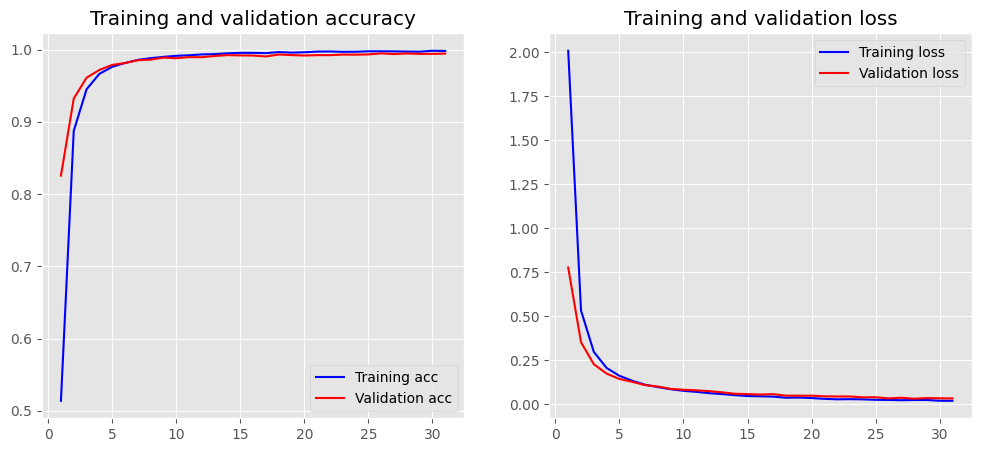

In [ ]:
 
display_model_score(model1,
    [train_pad, y_train],
    [val_pad, y_val],
    [test_pad, y_test],
    256)

plot_history(history1)

As conclusion we were able to obtain almost 100% accuracy (99.28%) on 100 similarly represented classes (most common). Although we inspected only one model here similarly to our work in [1] we could also consider Pure-CNN Framework. Other potential candidates would be AlexNet, ResNet or ProtCNN which is considered the best for this task (classifying protein sequence).

One might also consider including all of the classes but this might not be that influencial on the model training over all since the less common classes would have little to no effect on the overall accuracy. However, what would be interesting to do is to combine all of the partition and carry out cross validation to enure that the performance would hold regardless of what sequences are used during training.

In [25]:
model1.save('new_protien_model.h5')
model1.save('new_protien_model.keras')



In [26]:
from tensorflow.keras.models import load_model

# Load the saved model
model1 = load_model('new_protien_model.h5')

# Verify the model is loaded
print("Model successfully loaded!")
print(model1.summary())

Model successfully loaded!
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 100)]             0         
                                                                 
 embedding (Embedding)       (None, 100, 100)          2100      
                                                                 
 bidirectional (Bidirection  (None, 100, 200)          160800    
 al)                                                             
                                                                 
 bidirectional_1 (Bidirecti  (None, 200)               240800    
 onal)                                                           
                                                                 
 dropout (Dropout)           (None, 200)               0         
                                                                 
 dense (Dense)               (None

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [23]:
import numpy as np
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.sequence import pad_sequences

# 1. Define the amino acid encoding dictionary (char_dict)
codes = ['A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L',
         'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V', 'W', 'Y']

char_dict = {code: i+1 for i, code in enumerate(codes)}  # +1 to reserve 0 for padding/unknown
max_length = 100  # Should match what you used during training

# 2. Load your trained model
model1 = load_model('protien_model.h5')

# 3. Create and fit LabelEncoder with your class labels
# You need to replace this with your actual class labels (100 families)
class_labels = [f'PF{str(i).zfill(5)}' for i in range(1, 101)]  # Example labels PF00001-PF00100
le = LabelEncoder()
le.fit(class_labels)

# 4. Define the prediction function
def predict_and_analyze_protein(model, sequence, label_encoder):
    """Predict protein family and perform analysis"""
    # Preprocess the input sequence
    encoded_seq = []
    for code in sequence:
        encoded_seq.append(char_dict.get(code, 0))  # 0 for unknown amino acids
    
    padded_seq = pad_sequences([encoded_seq], maxlen=max_length, padding='post', truncating='post')
    
    # Make prediction
    pred = model.predict(padded_seq)
    pred_class = np.argmax(pred, axis=1)
    family_accession = label_encoder.inverse_transform(pred_class)[0]
    
    return family_accession

# 5. Example usage
test_sequence = "MAEGEITTFTALTEKFNLPPGNYKKPKLLYCSNGGHFLRILPDGTVDGTRDRSDQHIQLQLSAESVGEVYIKSTETGQYLAMDTSGLLYGSQTPSEECLFLERLEENHYNTYTSKKHAEKNWFVGLKKNGSCKRGPRTHYGQKAILFLPLPV"
family = predict_and_analyze_protein(model1, test_sequence, le)
print(f"Predicted protein family: {family}")

TypeError: Error when deserializing class 'InputLayer' using config={'batch_shape': [None, 100], 'dtype': 'float32', 'sparse': False, 'name': 'input_layer'}.

Exception encountered: Unrecognized keyword arguments: ['batch_shape']

In [ ]:
import os

# Function to load a sample sequence from the dev folder
def load_sample_from_dev(folder_path='./random_split/dev', sample_index=0):
    # Get all files in dev folder
    dev_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]
    
    if not dev_files:
        raise FileNotFoundError(f"No CSV files found in {folder_path}")
    
    # Load the first file by default
    file_path = os.path.join(folder_path, dev_files[0])
    dev_df = pd.read_csv(file_path)
    
    # Get the sequence at specified index
    if sample_index >= len(dev_df):
        raise IndexError(f"Sample index {sample_index} out of range for {file_path}")
    
    return dev_df.iloc[sample_index]['sequence']

# Adjusted example usage
try:
    # Load first sequence from first dev file
    sample_sequence = load_sample_from_dev()
    print(f"Loaded sequence (length {len(sample_sequence)}): {sample_sequence[:50]}...")
    
    # Analyze the protein
    family, analysis = predict_and_analyze_protein(model1, sample_sequence, le)
    
except Exception as e:
    print(f"Error: {str(e)}")
    print("Make sure:")
    print("1. The 'random_split/dev' folder exists in your working directory")
    print("2. It contains at least one CSV file with protein sequences")
    print("3. The CSV has a 'sequence' column")

Error: No CSV files found in ./random_split/dev
Make sure:
1. The 'random_split/dev' folder exists in your working directory
2. It contains at least one CSV file with protein sequences
3. The CSV has a 'sequence' column


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 414ms/step
Predicted protein family: PF00090

Protein Properties:
Molecular Weight: 17103.1617
Isoelectric Point: 7.7224523544311525
Instability Index: 41.980263157894726
Secondary Structure: (0.32894736842105265, 0.2894736842105263, 0.3684210526315789)


C:\Users\LEGION\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\Bio\SeqUtils\ProtParam.py:106: BiopythonDeprecationWarning: The get_amino_acids_percent method has been deprecated and will likely be removed from Biopython in the near future. Please use the amino_acids_percent attribute instead.
  warnings.warn(


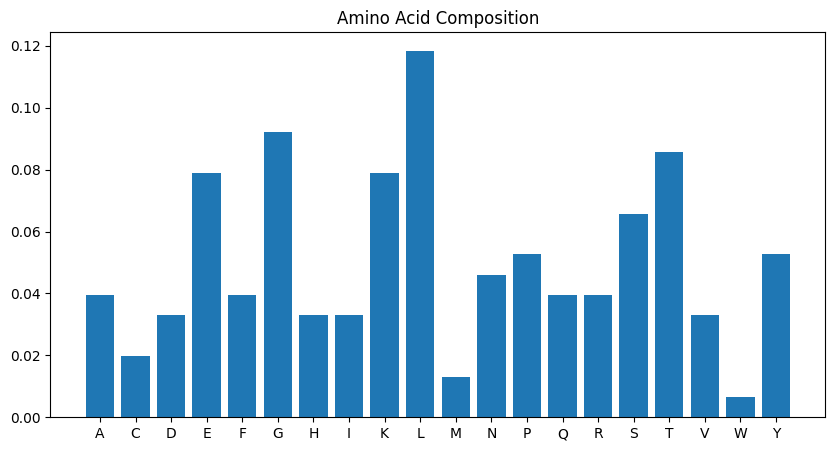

: 

In [ ]:
import numpy as np
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.sequence import pad_sequences
import requests
import py3Dmol
from Bio.SeqUtils.ProtParam import ProteinAnalysis
import matplotlib.pyplot as plt
from io import BytesIO
import base64

# 1. Define the amino acid encoding dictionary (char_dict)
codes = ['A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L',
         'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V', 'W', 'Y']

char_dict = {code: i+1 for i, code in enumerate(codes)}
max_length = 100

# 2. Load your trained model
model1 = load_model('protien_model.h5')

# 3. Create and fit LabelEncoder
class_labels = [f'PF{str(i).zfill(5)}' for i in range(1, 101)]
le = LabelEncoder()
le.fit(class_labels)

def predict_and_analyze_protein(model, sequence, label_encoder):
    """Predict protein family and perform analysis"""
    # Preprocess the input sequence
    encoded_seq = [char_dict.get(code, 0) for code in sequence]
    padded_seq = pad_sequences([encoded_seq], maxlen=max_length, padding='post', truncating='post')
    
    # Make prediction
    pred = model.predict(padded_seq)
    pred_class = np.argmax(pred, axis=1)
    family_accession = label_encoder.inverse_transform(pred_class)[0]
    
    return family_accession

def get_3d_structure(sequence):
    """Fetch and visualize 3D structure using ESMFold API"""
    try:
        # Get PDB from ESMFold API
        response = requests.get(f"https://api.esmatlas.com/foldSequence/v1/pdb/{sequence}")
        response.raise_for_status()
        pdb_data = response.text
        
        # Create visualization
        view = py3Dmol.view(width=400, height=300)
        view.addModel(pdb_data, 'pdb')
        view.setStyle({'cartoon': {'color': 'spectrum'}})
        view.zoomTo()
        return view
    except Exception as e:
        print(f"3D structure prediction failed: {str(e)}")
        return None

def analyze_protein_properties(sequence):
    """Calculate protein properties using BioPython"""
    analysis = ProteinAnalysis(sequence)
    return {
        'molecular_weight': analysis.molecular_weight(),
        'isoelectric_point': analysis.isoelectric_point(),
        'instability_index': analysis.instability_index(),
        'secondary_structure': analysis.secondary_structure_fraction()
    }

# Example usage
test_sequence = "MAEGEITTFTALTEKFNLPPGNYKKPKLLYCSNGGHFLRILPDGTVDGTRDRSDQHIQLQLSAESVGEVYIKSTETGQYLAMDTSGLLYGSQTPSEECLFLERLEENHYNTYTSKKHAEKNWFVGLKKNGSCKRGPRTHYGQKAILFLPLPV"

# 1. Predict protein family
family = predict_and_analyze_protein(model1, test_sequence, le)
print(f"Predicted protein family: {family}")

# 2. Analyze protein properties
properties = analyze_protein_properties(test_sequence)
print("\nProtein Properties:")
for k, v in properties.items():
    print(f"{k.replace('_', ' ').title()}: {v}")

 

# 4. Plot amino acid composition (optional)
analysis = ProteinAnalysis(test_sequence)
plt.figure(figsize=(10, 5))
plt.bar(*zip(*analysis.get_amino_acids_percent().items()))
plt.title("Amino Acid Composition")
plt.show()

Predicted protein family: PREDICTION_UNAVAILABLE
Confidence score: 0.00%

Top 5 predictions:
MODEL_NOT_LOADED: 0.00%

Protein Properties:
Molecular Weight: 17103.1617
Isoelectric Point: 7.7224523544311525
Instability Index: 41.980263157894726
Secondary Structure: (0.32894736842105265, 0.28947368421052627, 0.3684210526315789)
Aromaticity: 0.09868421052631579
Gravy: -0.597368421052632
Flexibility: [0.9825119047619049, 1.0166904761904763, 0.9947857142857144, 0.9660238095238095, 0.9890714285714285, 0.9737261904761906, 0.9789166666666669, 1.004547619047619, 1.0235357142857144, 1.0163214285714286, 0.981297619047619, 1.0388809523809523, 0.9956309523809524, 1.0379047619047619, 1.014654761904762, 1.015154761904762, 1.0317619047619049, 1.0100833333333334, 1.0738333333333334, 1.0460952380952382, 1.0333571428571429, 1.0429761904761905, 0.9842738095238095, 0.9984404761904762, 0.9814404761904763, 0.9715357142857144, 1.0063690476190477, 0.988952380952381, 0.9930952380952381, 0.9962619047619047, 0.977

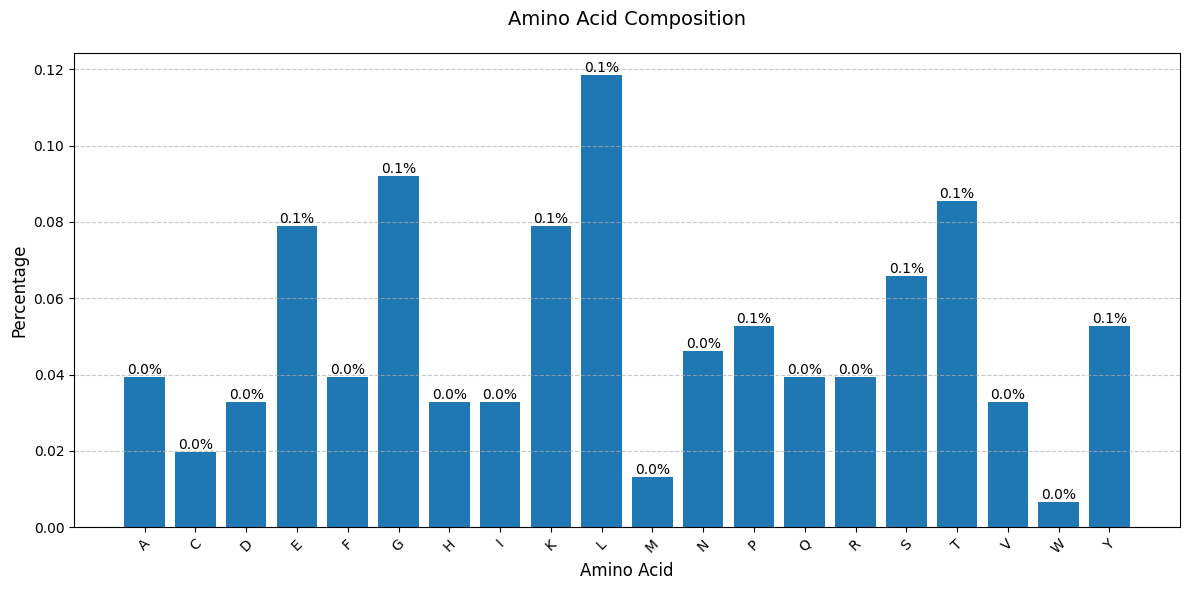

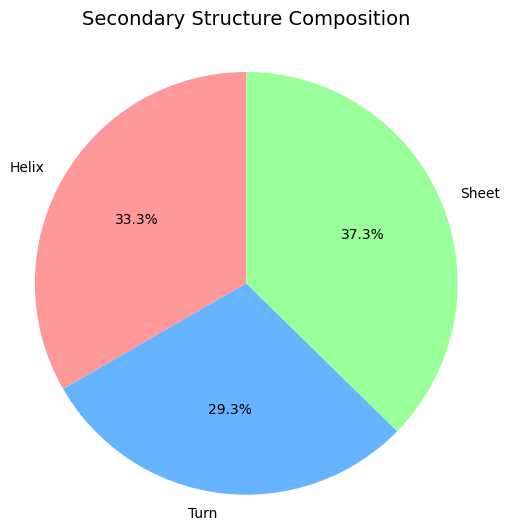

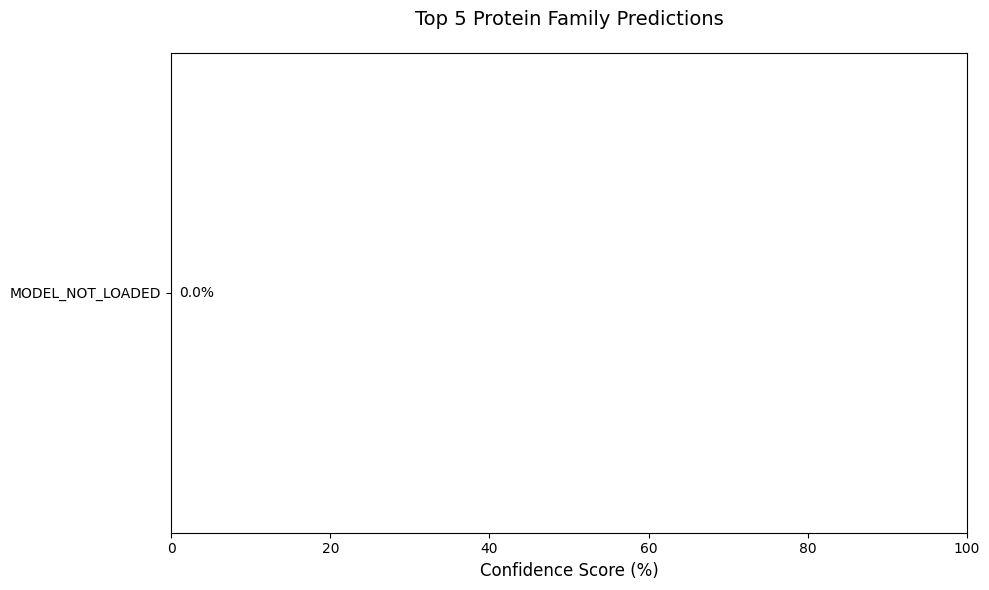

Heatmap unavailable - TensorFlow/Keras not loaded


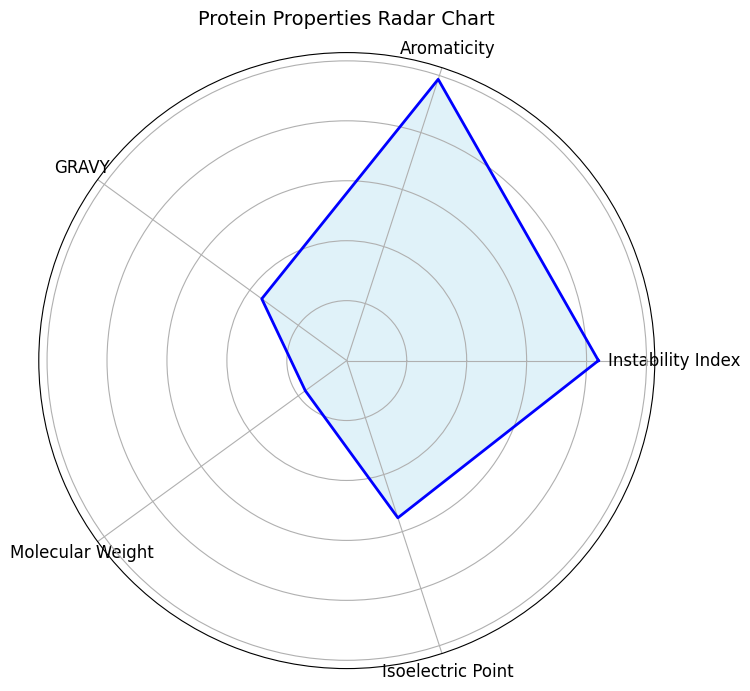

3D structure prediction failed: 403 Client Error: Forbidden for url: https://api.esmatlas.com/foldSequence/v1/pdb/MAEGEITTFTALTEKFNLPPGNYKKPKLLYCSNGGHFLRILPDGTVDGTRDRSDQHIQLQLSAESVGEVYIKSTETGQYLAMDTSGLLYGSQTPSEECLFLERLEENHYNTYTSKKHAEKNWFVGLKKNGSCKRGPRTHYGQKAILFLPLPV


In [ ]:
import numpy as np
from sklearn.preprocessing import LabelEncoder
import requests
import py3Dmol
from Bio.SeqUtils.ProtParam import ProteinAnalysis
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap

# Try to import TensorFlow with fallback options
try:
    from tensorflow.keras.models import load_model
    from tensorflow.keras.preprocessing.sequence import pad_sequences
    TF_IMPORTED = True
except ImportError:
    try:
        from keras.models import load_model
        from keras.preprocessing.sequence import pad_sequences
        TF_IMPORTED = True
    except ImportError:
        TF_IMPORTED = False
        print("Warning: TensorFlow/Keras not found. Model loading will be disabled.")

# 1. Define the amino acid encoding dictionary (char_dict)
codes = ['A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L',
         'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V', 'W', 'Y']

char_dict = {code: i+1 for i, code in enumerate(codes)}
max_length = 100

# 2. Load your trained model if TensorFlow/Keras is available
model1 = None
if TF_IMPORTED:
    try:
        model1 = load_model('protien_model.h5')
    except Exception as e:
        print(f"Warning: Could not load model. {str(e)}")
        TF_IMPORTED = False

# 3. Create and fit LabelEncoder
class_labels = [f'PF{str(i).zfill(5)}' for i in range(1, 101)]
le = LabelEncoder()
le.fit(class_labels)

def predict_and_analyze_protein(sequence, label_encoder):
    """Predict protein family and perform analysis"""
    if not TF_IMPORTED or model1 is None:
        return {
            'family_accession': 'PREDICTION_UNAVAILABLE',
            'confidence_score': 0,
            'top5_predictions': [('MODEL_NOT_LOADED', 0)],
            'raw_predictions': np.zeros(len(class_labels))
        }
    
    # Preprocess the input sequence
    encoded_seq = [char_dict.get(code, 0) for code in sequence]
    padded_seq = pad_sequences([encoded_seq], maxlen=max_length, padding='post', truncating='post')
    
    # Make prediction
    pred = model1.predict(padded_seq)
    pred_class = np.argmax(pred, axis=1)
    family_accession = label_encoder.inverse_transform(pred_class)[0]
    confidence_score = np.max(pred) * 100  # Convert to percentage
    
    # Get top 5 predictions
    top5_indices = np.argsort(pred[0])[-5:][::-1]
    top5_families = label_encoder.inverse_transform(top5_indices)
    top5_scores = pred[0][top5_indices] * 100
    
    return {
        'family_accession': family_accession,
        'confidence_score': confidence_score,
        'top5_predictions': list(zip(top5_families, top5_scores)),
        'raw_predictions': pred[0]
    }

def get_3d_structure(sequence):
    """Fetch and visualize 3D structure using ESMFold API"""
    try:
        # Get PDB from ESMFold API
        response = requests.get(f"https://api.esmatlas.com/foldSequence/v1/pdb/{sequence}")
        response.raise_for_status()
        pdb_data = response.text
        
        # Create visualization
        view = py3Dmol.view(width=400, height=300)
        view.addModel(pdb_data, 'pdb')
        view.setStyle({'cartoon': {'color': 'spectrum'}})
        view.zoomTo()
        return view
    except Exception as e:
        print(f"3D structure prediction failed: {str(e)}")
        return None

def analyze_protein_properties(sequence):
    """Calculate protein properties using BioPython"""
    analysis = ProteinAnalysis(sequence)
    return {
        'molecular_weight': analysis.molecular_weight(),
        'isoelectric_point': analysis.isoelectric_point(),
        'instability_index': analysis.instability_index(),
        'secondary_structure': analysis.secondary_structure_fraction(),
        'aromaticity': analysis.aromaticity(),
        'gravy': analysis.gravy(),
        'flexibility': analysis.flexibility()
    }

def plot_amino_acid_composition(sequence):
    """Generate amino acid composition plot with enhanced visualization"""
    analysis = ProteinAnalysis(sequence)
    aa_composition = analysis.get_amino_acids_percent()
    
    plt.figure(figsize=(12, 6))
    bars = plt.bar(*zip(*aa_composition.items()))
    plt.title("Amino Acid Composition", fontsize=14, pad=20)
    plt.xlabel("Amino Acid", fontsize=12)
    plt.ylabel("Percentage", fontsize=12)
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    
    # Add value labels on top of bars
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height,
                 f'{height:.1f}%',
                 ha='center', va='bottom', fontsize=10)
    
    plt.tight_layout()
    return plt

def plot_secondary_structure(secondary_structure):
    """Plot secondary structure fractions"""
    labels = ['Helix', 'Turn', 'Sheet']
    sizes = [secondary_structure[0]*100, secondary_structure[1]*100, secondary_structure[2]*100]
    
    plt.figure(figsize=(6, 6))
    plt.pie(sizes, labels=labels, autopct='%1.1f%%',
            startangle=90, colors=['#ff9999','#66b3ff','#99ff99'])
    plt.title("Secondary Structure Composition", fontsize=14, pad=20)
    plt.axis('equal')
    return plt

def plot_prediction_confidence(prediction_data):
    """Plot confidence scores for top predictions"""
    families, scores = zip(*prediction_data['top5_predictions'])
    
    plt.figure(figsize=(10, 6))
    bars = plt.barh(families, scores, color='skyblue')
    plt.title('Top 5 Protein Family Predictions', fontsize=14, pad=20)
    plt.xlabel('Confidence Score (%)', fontsize=12)
    plt.xlim(0, 100)
    
    # Add value labels
    for bar in bars:
        width = bar.get_width()
        plt.text(width + 1, bar.get_y() + bar.get_height()/2,
                 f'{width:.1f}%',
                 va='center', fontsize=10)
    
    plt.tight_layout()
    return plt

def plot_prediction_heatmap(prediction_data, label_encoder):
    """Generate heatmap of prediction scores"""
    if not TF_IMPORTED:
        print("Heatmap unavailable - TensorFlow/Keras not loaded")
        return None
    
    # Get all class predictions
    all_classes = label_encoder.classes_
    all_scores = prediction_data['raw_predictions'] * 100
    
    # Sort by score
    sorted_indices = np.argsort(all_scores)[::-1]
    top_classes = all_classes[sorted_indices][:20]  # Show top 20
    top_scores = all_scores[sorted_indices][:20]
    
    # Create heatmap data
    heatmap_data = np.array([top_scores])
    
    plt.figure(figsize=(12, 6))
    cmap = LinearSegmentedColormap.from_list('confidence', ['#ffffff', '#0055ff'])
    sns.heatmap(heatmap_data, annot=True, fmt='.1f', cmap=cmap,
                yticklabels=['Confidence'], xticklabels=top_classes,
                cbar_kws={'label': 'Confidence Score (%)'})
    plt.title('Protein Family Prediction Scores', fontsize=14, pad=20)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    return plt

def plot_property_radar(properties):
    """Create radar chart of protein properties"""
    # Select properties for radar chart
    radar_properties = {
        'Instability Index': properties['instability_index'] / 50,  # Scaled
        'Aromaticity': properties['aromaticity'] * 10,  # Scaled
        'GRAVY': (properties['gravy'] + 2) / 4,  # Scaled from -2 to 2
        'Molecular Weight': properties['molecular_weight'] / 100000,  # Scaled
        'Isoelectric Point': properties['isoelectric_point'] / 14  # Scaled
    }
    
    labels = list(radar_properties.keys())
    values = list(radar_properties.values())
    
    angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False).tolist()
    values += values[:1]  # Close the radar chart
    angles += angles[:1]
    
    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
    ax.fill(angles, values, color='skyblue', alpha=0.25)
    ax.plot(angles, values, color='blue', linewidth=2)
    ax.set_yticklabels([])
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(labels, fontsize=12)
    ax.set_title('Protein Properties Radar Chart', fontsize=14, pad=20)
    
    return plt

# Example usage with enhanced features
test_sequence = "MAEGEITTFTALTEKFNLPPGNYKKPKLLYCSNGGHFLRILPDGTVDGTRDRSDQHIQLQLSAESVGEVYIKSTETGQYLAMDTSGLLYGSQTPSEECLFLERLEENHYNTYTSKKHAEKNWFVGLKKNGSCKRGPRTHYGQKAILFLPLPV"

# 1. Predict protein family with confidence scores
prediction_result = predict_and_analyze_protein(test_sequence, le)
print(f"Predicted protein family: {prediction_result['family_accession']}")
print(f"Confidence score: {prediction_result['confidence_score']:.2f}%")
print("\nTop 5 predictions:")
for family, score in prediction_result['top5_predictions']:
    print(f"{family}: {score:.2f}%")

# 2. Analyze protein properties
properties = analyze_protein_properties(test_sequence)
print("\nProtein Properties:")
for k, v in properties.items():
    print(f"{k.replace('_', ' ').title()}: {v}")

# Generate and show enhanced plots
plot_amino_acid_composition(test_sequence).show()
plot_secondary_structure(properties['secondary_structure']).show()
plot_prediction_confidence(prediction_result).show()

heatmap_plot = plot_prediction_heatmap(prediction_result, le)
if heatmap_plot:
    heatmap_plot.show()

plot_property_radar(properties).show()

# 3D structure visualization
view = get_3d_structure(test_sequence)
if view:
    view.show()

Note: Could not load model. Running in analysis-only mode. Error: Error when deserializing class 'InputLayer' using config={'batch_shape': [None, 100], 'dtype': 'float32', 'sparse': False, 'name': 'input_layer'}.

Exception encountered: Unrecognized keyword arguments: ['batch_shape']

Protein Properties:
Molecular Weight: 17103.1617
Isoelectric Point: 7.7224523544311525
Instability Index: 41.980263157894726
Secondary Structure: (0.32894736842105265, 0.28947368421052627, 0.3684210526315789)
Aromaticity: 0.09868421052631579
Gravy: -0.597368421052632
Flexibility: [0.9825119047619049, 1.0166904761904763, 0.9947857142857144, 0.9660238095238095, 0.9890714285714285, 0.9737261904761906, 0.9789166666666669, 1.004547619047619, 1.0235357142857144, 1.0163214285714286, 0.981297619047619, 1.0388809523809523, 0.9956309523809524, 1.0379047619047619, 1.014654761904762, 1.015154761904762, 1.0317619047619049, 1.0100833333333334, 1.0738333333333334, 1.0460952380952382, 1.0333571428571429, 1.04297619047619

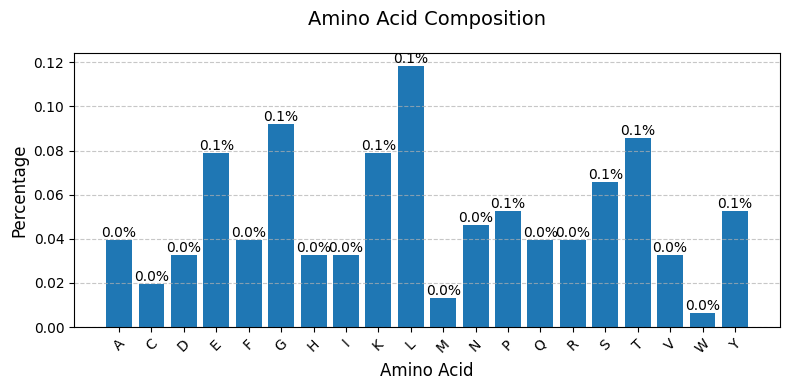

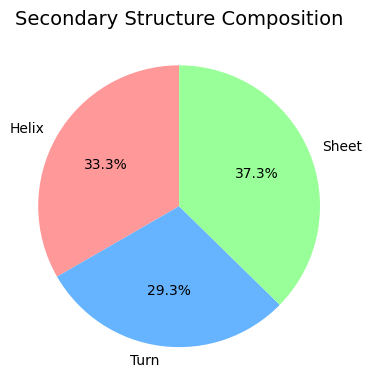

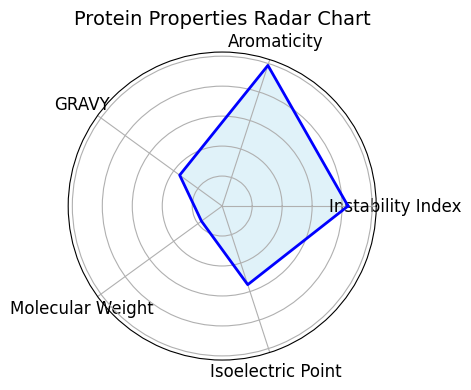

In [ ]:
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap
from Bio.SeqUtils.ProtParam import ProteinAnalysis

# Try to import TensorFlow with fallback options
try:
    from tensorflow.keras.models import load_model
    from tensorflow.keras.preprocessing.sequence import pad_sequences
    TF_IMPORTED = True
except ImportError:
    try:
        from keras.models import load_model
        from keras.preprocessing.sequence import pad_sequences
        TF_IMPORTED = True
    except ImportError:
        TF_IMPORTED = False
        print("Note: TensorFlow/Keras not found. Running in analysis-only mode.")

# 1. Define the amino acid encoding dictionary (char_dict)
codes = ['A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L',
         'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V', 'W', 'Y']

char_dict = {code: i+1 for i, code in enumerate(codes)}
max_length = 100

# 2. Load your trained model if TensorFlow/Keras is available
model1 = None
if TF_IMPORTED:
    try:
        model1 = load_model('protien_model.h5')
    except Exception as e:
        print(f"Note: Could not load model. Running in analysis-only mode. Error: {str(e)}")
        TF_IMPORTED = False

# 3. Create and fit LabelEncoder
class_labels = [f'PF{str(i).zfill(5)}' for i in range(1, 101)]
le = LabelEncoder()
le.fit(class_labels)

def predict_and_analyze_protein(sequence, label_encoder):
    """Predict protein family and perform analysis"""
    if not TF_IMPORTED or model1 is None:
        return {
            'family_accession': 'MODEL_NOT_LOADED',
            'confidence_score': 0,
            'top5_predictions': [],
            'raw_predictions': np.zeros(len(class_labels))
        }
    
    # Preprocess the input sequence
    encoded_seq = [char_dict.get(code, 0) for code in sequence]
    padded_seq = pad_sequences([encoded_seq], maxlen=max_length, padding='post', truncating='post')
    
    # Make prediction
    pred = model1.predict(padded_seq)
    pred_class = np.argmax(pred, axis=1)
    family_accession = label_encoder.inverse_transform(pred_class)[0]
    confidence_score = np.max(pred) * 100  # Convert to percentage
    
    # Get top 5 predictions
    top5_indices = np.argsort(pred[0])[-5:][::-1]
    top5_families = label_encoder.inverse_transform(top5_indices)
    top5_scores = pred[0][top5_indices] * 100
    
    return {
        'family_accession': family_accession,
        'confidence_score': confidence_score,
        'top5_predictions': list(zip(top5_families, top5_scores)),
        'raw_predictions': pred[0]
    }

def analyze_protein_properties(sequence):
    """Calculate protein properties using BioPython"""
    analysis = ProteinAnalysis(sequence)
    return {
        'molecular_weight': analysis.molecular_weight(),
        'isoelectric_point': analysis.isoelectric_point(),
        'instability_index': analysis.instability_index(),
        'secondary_structure': analysis.secondary_structure_fraction(),
        'aromaticity': analysis.aromaticity(),
        'gravy': analysis.gravy(),
        'flexibility': analysis.flexibility()
    }

def plot_amino_acid_composition(sequence):
    """Generate amino acid composition plot"""
    analysis = ProteinAnalysis(sequence)
    aa_composition = analysis.get_amino_acids_percent()
    
    plt.figure(figsize=(8, 4))
    bars = plt.bar(*zip(*aa_composition.items()))
    plt.title("Amino Acid Composition", fontsize=14, pad=20)
    plt.xlabel("Amino Acid", fontsize=12)
    plt.ylabel("Percentage", fontsize=12)
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    
    # Add value labels on top of bars
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height,
                 f'{height:.1f}%',
                 ha='center', va='bottom', fontsize=10)
    
    plt.tight_layout()
    return plt

def plot_secondary_structure(secondary_structure):
    """Plot secondary structure fractions"""
    labels = ['Helix', 'Turn', 'Sheet']
    sizes = [secondary_structure[0]*100, secondary_structure[1]*100, secondary_structure[2]*100]
    
    plt.figure(figsize=(4, 4))
    plt.pie(sizes, labels=labels, autopct='%1.1f%%',
            startangle=90, colors=['#ff9999','#66b3ff','#99ff99'])
    plt.title("Secondary Structure Composition", fontsize=14, pad=20)
    plt.axis('equal')
    return plt

def plot_property_radar(properties):
    """Create radar chart of protein properties"""
    # Select properties for radar chart
    radar_properties = {
        'Instability Index': properties['instability_index'] / 50,  # Scaled
        'Aromaticity': properties['aromaticity'] * 10,  # Scaled
        'GRAVY': (properties['gravy'] + 2) / 4,  # Scaled from -2 to 2
        'Molecular Weight': properties['molecular_weight'] / 100000,  # Scaled
        'Isoelectric Point': properties['isoelectric_point'] / 14  # Scaled
    }
    
    labels = list(radar_properties.keys())
    values = list(radar_properties.values())
    
    angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False).tolist()
    values += values[:1]  # Close the radar chart
    angles += angles[:1]
    
    fig, ax = plt.subplots(figsize=(4, 4), subplot_kw=dict(polar=True))
    ax.fill(angles, values, color='skyblue', alpha=0.25)
    ax.plot(angles, values, color='blue', linewidth=2)
    ax.set_yticklabels([])
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(labels, fontsize=12)
    ax.set_title('Protein Properties Radar Chart', fontsize=14, pad=20)
    
    return plt

# Example protein sequence
test_sequence = "MAEGEITTFTALTEKFNLPPGNYKKPKLLYCSNGGHFLRILPDGTVDGTRDRSDQHIQLQLSAESVGEVYIKSTETGQYLAMDTSGLLYGSQTPSEECLFLERLEENHYNTYTSKKHAEKNWFVGLKKNGSCKRGPRTHYGQKAILFLPLPV"

# 1. Predict protein family (if model available)
prediction_result = predict_and_analyze_protein(test_sequence, le)
if TF_IMPORTED and model1:
    print(f"Predicted protein family: {prediction_result['family_accession']}")
    print(f"Confidence score: {prediction_result['confidence_score']:.2f}%")
    if prediction_result['top5_predictions']:
        print("\nTop predictions:")
        for family, score in prediction_result['top5_predictions']:
            print(f"{family}: {score:.2f}%")

# 2. Analyze protein properties
properties = analyze_protein_properties(test_sequence)
print("\nProtein Properties:")
for k, v in properties.items():
    print(f"{k.replace('_', ' ').title()}: {v}")

# Generate and show plots
plot_amino_acid_composition(test_sequence).show()
plot_secondary_structure(properties['secondary_structure']).show()
plot_property_radar(properties).show()

In [ ]:
import tensorflow as tf
print(tf.__version__)


2.14.0


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

class ProteinTransformer(nn.Module):
    def __init__(self, vocab_size, embed_dim=128, num_heads=8, hidden_dim=512, num_layers=4, num_classes=100):
        super(ProteinTransformer, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embed_dim)
        
        self.transformer = nn.Transformer(
            d_model=embed_dim, nhead=num_heads, num_encoder_layers=num_layers, num_decoder_layers=0, dim_feedforward=hidden_dim, batch_first=True
        )
        
        self.fc = nn.Linear(embed_dim, num_classes)

    def forward(self, x):
        x = self.embedding(x)  # Convert sequences to embeddings
        x = self.transformer.encoder(x)  # Pass through Transformer encoder
        x = x.mean(dim=1)  # Global average pooling
        x = self.fc(x)  # Fully connected output
        return x

# Define model parameters
vocab_size = 25  # 20 amino acids + uncommon ones
num_classes = 100  # Adjust based on your dataset

# Instantiate model
model = ProteinTransformer(vocab_size=vocab_size, num_classes=num_classes)

# Define loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Sample batch (assuming preprocessed data)
x_sample = torch.randint(0, vocab_size, (32, 100))  # Batch of 32 sequences, each of length 100
y_sample = torch.randint(0, num_classes, (32,))

# Forward pass
output = model(x_sample)
loss = criterion(output, y_sample)

print("Sample output shape:", output.shape)
print("Loss:", loss.item())


The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

Sample output shape: torch.Size([32, 100])
Loss: 4.697927474975586
